# <font color='steelblue'>
______________________________________________________________________________________________________________________________________________________
### <center> <font color='steelblue'> Post-graduation in Data Science for Finance
##### <center> <font color='steelblue'> 2024 / 25
# <center> <font color='steelblue'> Asset Pricing & Portfolio Management
### <center> <font color='steelblue'><font> Prof. Jorge Bravo </font>
______________________________________________________________________________________________________________________________________________________
### <center> <font color='steelblue'><font> Students:</font>
##### <center> <font color='steelblue'><font> Diogo Rodrigues, 20211666 </font>
##### <center> <font color='steelblue'><font> Gonçalo Gomes, 20211007 </font>
##### <center> <font color='steelblue'><font> Petr Terletskiy, 20211580 </font>
##### <center> <font color='steelblue'><font> Tiago Paulino, 20211601 </font>

______________________________________________________________________________________________________________________________________________________
### <center> <font color='steelblue'><font> Group Project </font>
______________________________________________________________________________________________________________________________________________________


### Work Directory's PATH Definition


In [ ]:
# Working Directory --> Quando correrem o notebook, criem um directory semelhante a este e façam comment ao meu path que tenho aqui em baixo

## Gonçalo ##
'''
data_path = "/content/drive/MyDrive/Nova Ims/Asset Pricing & Portfolio Management/Project/DataFrames/"
path = "/content/drive/MyDrive/Nova Ims/Asset Pricing & Portfolio Management/Project/"
'''

## Paulino ##

'''
data_path = "/content/drive/MyDrive/1. DSF/APPM/ProjectA/DataFrames/"
path = "/content/drive/MyDrive/1. DSF/APPM/ProjectA"
'''

## Petr ##

data_path = "/content/drive/MyDrive/NOVA IMS/Data Science for Finance/APPM/Group Project/DataFrames/"
path = "/content/drive/MyDrive/NOVA IMS/Data Science for Finance/APPM/Group Project/"


## Diogo ##
'''
data_path = "/content/drive/MyDrive/PG data science for finance/asset pricing and portfolio management/group project/data/"
path = "/content/drive/MyDrive/PG data science for finance/asset pricing and portfolio management/group project"
'''

'\ndata_path = "/content/drive/MyDrive/PG data science for finance/asset pricing and portfolio management/group project/data/"     #todo\npath = "/content/drive/MyDrive/PG data science for finance/asset pricing and portfolio management/group project"          #todo\n'

### Importing Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.1 MB/s eta 0:00:00


In [ ]:
from datetime import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import norm, t, jarque_bera, probplot, skew, kurtosis, linregress
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.stats.diagnostic import acorr_ljungbox

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import expected_returns, risk_models, EfficientFrontier

from scipy.optimize import minimize

# Part 1

### Asset Definition

In [ ]:
# Defining the portfolio tickers

tickers_dict = {
    'Apple': 'AAPL',
    'Microsoft': 'MSFT',
    'Tesla': 'TSLA',
    'JPM': 'JPM',
    'Nasdaq': 'QQQ',
    'SP500': '^GSPC',
    'Gold': 'GC=F',
    'Oil': 'CL=F',
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD'
}

# Getting end date
end_date = datetime.strptime('2024-09-27', '%Y-%m-%d')

### Extracting the Market Data

In [ ]:
# Download data from 01-01-2010 to 27-09-2024
market_data = yf.download(list(tickers_dict.values()), start="2010-01-01", end=end_date, interval='1d')

# Extract adjusted close prices for all tickers
adj_close = market_data['Adj Close']

'''
Adding the missing dates that are due to the fact that, while we dont have any filled values for our crypto assets, we dont have the dates regarding the weekends for the remaining assets.
This is done to standardize the dataframe because, when we have values for the crypto assets, the weekends appear since the crypto market is open every day.
'''
adj_close = adj_close.reindex(pd.date_range(adj_close.index[0], adj_close.index[-1]), fill_value=None)

adj_close.head(10)

[*********************100%***********************]  10 of 10 completed


Ticker,AAPL,BTC-USD,CL=F,ETH-USD,GC=F,JPM,MSFT,QQQ,TSLA,^GSPC
2010-01-04 00:00:00+00:00,6.454506,NaN,81.510002,NaN,1117.699951,29.335228,23.347319,40.611580,NaN,1132.989990
2010-01-05 00:00:00+00:00,6.465666,NaN,81.769997,NaN,1118.099976,29.903456,23.354860,40.611580,NaN,1136.520020
2010-01-06 00:00:00+00:00,6.362820,NaN,83.180000,NaN,1135.900024,30.067751,23.211542,40.366611,NaN,1137.140015
2010-01-07 00:00:00+00:00,6.351056,NaN,82.660004,NaN,1133.099976,30.663363,22.970140,40.392849,NaN,1141.689941
2010-01-08 00:00:00+00:00,6.393280,NaN,82.750000,NaN,1138.199951,30.588055,23.128557,40.725300,NaN,1144.979980
2010-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11 00:00:00+00:00,6.336882,NaN,82.519997,NaN,1150.699951,30.485355,22.834362,40.559086,NaN,1146.979980
2010-01-12 00:00:00+00:00,6.264800,NaN,80.790001,NaN,1128.900024,29.773386,22.683483,40.051647,NaN,1136.219971
2010-01-13 00:00:00+00:00,6.353168,NaN,79.650002,NaN,1136.400024,30.293673,22.894707,40.550323,NaN,1145.680054


#### Saving & Loading the Initial DataFrame

In [ ]:
# Saving the DataFrame
adj_close.to_csv(data_path + 'adj_close.csv')

### Loading the Initial DataFrame

In [ ]:
# Loading the saved DataFrame
adj_close = pd.read_csv(data_path + "adj_close.csv", index_col=0)

adj_close.tail()

,AAPL,BTC-USD,CL=F,ETH-USD,GC=F,JPM,MSFT,QQQ,TSLA,^GSPC
2024-09-22 00:00:00+00:00,NaN,63648.710938,NaN,2582.862549,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-23 00:00:00+00:00,226.470001,63329.800781,70.370003,2648.546387,2626.500000,211.440002,433.510010,483.040009,250.000000,5718.569824
2024-09-24 00:00:00+00:00,227.369995,64301.968750,71.559998,2654.354980,2651.199951,211.589996,429.170013,485.369995,254.270004,5732.930176
2024-09-25 00:00:00+00:00,226.369995,63143.144531,69.690002,2579.388672,2659.199951,210.190002,432.109985,485.820007,257.019989,5722.259766
2024-09-26 00:00:00+00:00,227.520004,65181.019531,67.669998,2632.199951,2669.899902,209.779999,431.309998,489.470001,254.220001,5745.370117


In [ ]:
# Loading the saved DataFrame
adj_close = pd.read_csv(data_path + "adj_close.csv", index_col=0)

# Converting the Date column to datetime object
adj_close.index = pd.to_datetime(adj_close.index)

adj_close.head(10)

,AAPL,BTC-USD,CL=F,ETH-USD,GC=F,JPM,MSFT,QQQ,TSLA,^GSPC
2010-01-04 00:00:00+00:00,6.454506,NaN,81.510002,NaN,1117.699951,29.335228,23.347319,40.611580,NaN,1132.989990
2010-01-05 00:00:00+00:00,6.465666,NaN,81.769997,NaN,1118.099976,29.903456,23.354860,40.611580,NaN,1136.520020
2010-01-06 00:00:00+00:00,6.362820,NaN,83.180000,NaN,1135.900024,30.067751,23.211542,40.366611,NaN,1137.140015
2010-01-07 00:00:00+00:00,6.351056,NaN,82.660004,NaN,1133.099976,30.663363,22.970140,40.392849,NaN,1141.689941
2010-01-08 00:00:00+00:00,6.393280,NaN,82.750000,NaN,1138.199951,30.588055,23.128557,40.725300,NaN,1144.979980
2010-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11 00:00:00+00:00,6.336882,NaN,82.519997,NaN,1150.699951,30.485355,22.834362,40.559086,NaN,1146.979980
2010-01-12 00:00:00+00:00,6.264800,NaN,80.790001,NaN,1128.900024,29.773386,22.683483,40.051647,NaN,1136.219971
2010-01-13 00:00:00+00:00,6.353168,NaN,79.650002,NaN,1136.400024,30.293673,22.894707,40.550323,NaN,1145.680054


### Log Return Calculation

In [ ]:
# Computing log returns

# Daily log returns
daily_log_returns = np.log(adj_close / adj_close.shift(1))

# Weekly log returns
weekly_log_returns = np.log(adj_close.resample("W").last() / adj_close.resample("W").last().shift(1))

# Monthly log returns
monthly_log_returns = np.log(adj_close.resample("M").last() / adj_close.resample("M").last().shift(1))

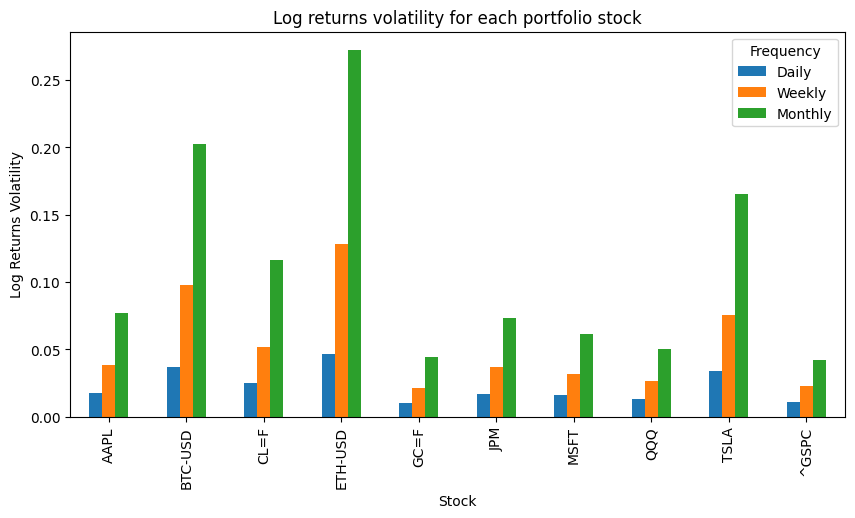

In [ ]:
# Calculate volatility
volatility_daily = daily_log_returns.std()
volatility_weekly = weekly_log_returns.std()
volatility_monthly = monthly_log_returns.std()

# Create a DataFrame for easier plotting
volatility_df = pd.DataFrame({
    'Daily': volatility_daily,
    'Weekly': volatility_weekly,
    'Monthly': volatility_monthly
})

# Plot
volatility_df.plot(kind='bar', figsize=(10, 5))
plt.title('Log returns volatility for each portfolio stock')
plt.xlabel('Stock')
plt.ylabel('Log Returns Volatility')
plt.legend(title='Frequency')
plt.show()

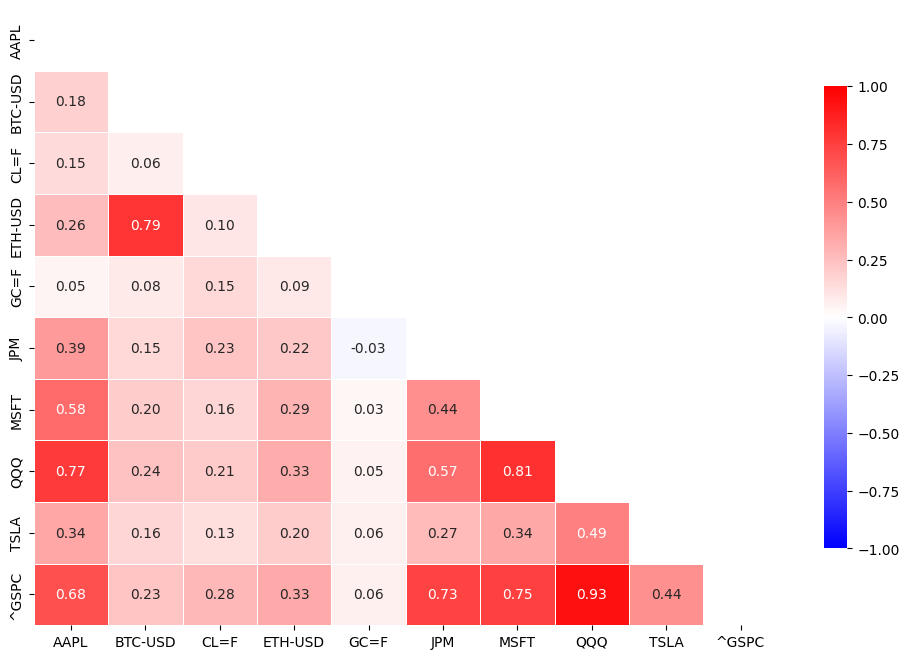

In [ ]:
# Assuming 'log_returns' is a DataFrame containing the log returns for each asset.
# For example, each column could be named after the ticker symbols, e.g., 'AAPL', 'JPM', etc.

# Calculate the correlation matrix
corr_matrix = daily_log_returns.corr()

# Generate a mask for the upper triangle to only show the lower triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure with modified figsize for lower height
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap="bwr", annot=True, fmt=".2f",
            square=False,  # Set square to False for rectangular cells
            linewidths=.5, cbar_kws={"shrink": .75}, vmin=-1, vmax=1,
            annot_kws={"size": 10})  # Adjust annotation size

plt.show()

In [ ]:
daily_log_returns.head(5)

,AAPL,BTC-USD,CL=F,ETH-USD,GC=F,JPM,MSFT,QQQ,TSLA,^GSPC
2010-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05 00:00:00+00:00,0.001728,NaN,0.003185,NaN,0.000358,0.019185,0.000323,0.000000,NaN,0.003111
2010-01-06 00:00:00+00:00,-0.016034,NaN,0.017097,NaN,0.015795,0.005479,-0.006155,-0.006050,NaN,0.000545
2010-01-07 00:00:00+00:00,-0.001851,NaN,-0.006271,NaN,-0.002468,0.019615,-0.010455,0.000650,NaN,0.003993
2010-01-08 00:00:00+00:00,0.006626,NaN,0.001088,NaN,0.004491,-0.002459,0.006873,0.008197,NaN,0.002878


#### Saving the log return dataframes

In [ ]:
daily_log_returns.to_csv(data_path + 'daily_log_returns.csv')

weekly_log_returns.to_csv(data_path + 'weekly_log_returns.csv')

monthly_log_returns.to_csv(data_path + 'monthly_log_returns.csv')

## Data Analysis

In [ ]:
daily_log_returns = pd.read_csv(data_path + "daily_log_returns.csv", index_col=0)
daily_log_returns.index = pd.to_datetime(daily_log_returns.index)

weekly_log_returns = pd.read_csv(data_path + "weekly_log_returns.csv", index_col=0)
weekly_log_returns.index = pd.to_datetime(weekly_log_returns.index)

monthly_log_returns = pd.read_csv(data_path + "monthly_log_returns.csv", index_col=0)
monthly_log_returns.index = pd.to_datetime(monthly_log_returns.index)

In [ ]:
# Creating the storage folders
folders = ["1. ACFs", "2. Normality", "3. Skewness", "4. VolatilityClustering", "5. LeverageEffects", "6. ConditionalNonNormality"]

for folder in folders:
  full_path = os.path.join(str(path), folder)
  if not os.path.exists(full_path):
      os.mkdir(full_path)
      print(full_path)

### 1.) Absence of auto-correlation Analysis

In [ ]:
timeframe = "daily"

os.path.join(str(path), "1. ACFs/", str(timeframe).capitalize())

'/content/drive/MyDrive/NOVA IMS/Data Science for Finance/APPM/Group Project/1. ACFs/Daily'

In [ ]:
# Initialize an empty list to store the results
results_list = []

def plot_and_save_acf(df, timeframe):

    full_path = os.path.join(str(path), "1. ACFs/", str(timeframe).capitalize())
    if not os.path.exists(full_path):
        os.makedirs(full_path)

    for asset_name, ticker in tickers_dict.items():
        # Calculate the ACF values and plot with confidence bands
        acf_values = acf(df[ticker].dropna(), nlags=240, fft=True)

        # Find the min and max values of ACF (excluding the first value, which is 1)
        acf_min, acf_max = min(acf_values[1:]), max(acf_values[1:])

        # Plot ACF with confidence interval
        plot_acf(df[ticker].dropna(), lags=30, zero=False, alpha=0.05)  # 95% confidence bands

        # Adjust the y-axis to be a bit wider than the actual min and max ACF values
        plt.ylim(acf_min - 0.05, acf_max + 0.05)

        # Save the plot
        plt.title(f'Autocorrelation of {timeframe} Log Returns ({asset_name})')
        plt.savefig(f"{full_path}/ACF-{asset_name}.png")
        plt.close()

        # Perform Ljung-Box test at multiple lags (e.g., 10, 20, 30)
        ljung_box_test = acorr_ljungbox(df[ticker].dropna(), lags=[10, 20, 30], return_df=True)

        # Append results to list
        for lag, row in ljung_box_test.iterrows():
            results_list.append({
                'Asset': asset_name,
                'Timeframe': timeframe,
                'Lag': lag,
                'Ljung-Box Statistic': row['lb_stat'],
                'p-value': row['lb_pvalue']
            })

    # Convert the results list to a DataFrame and save it to a CSV
    results_df = pd.DataFrame.from_dict(results_list, orient="columns")
    results_df.to_csv(os.path.join(str(path), "1. ACFs/", "ljung_box_results.csv"), index=False)

plot_and_save_acf(daily_log_returns, "Daily")
plot_and_save_acf(weekly_log_returns, "Weekly")
plot_and_save_acf(monthly_log_returns, "Monthly")

### 2.) The unconditional distribution of daily returns does not follow the normal distribution/Fat Tails

In [ ]:
def test_normality_and_plot(df, timeframe, tickers_dict, path):
    full_path = os.path.join(str(path), "2. Normality", str(timeframe).capitalize())
    if not os.path.exists(full_path):
        os.makedirs(full_path)

    for asset_name, ticker in tickers_dict.items():
        returns = df[ticker].dropna()

        # Jarque-Bera test for normality
        jb_statistic, jb_p_value = jarque_bera(returns)

        # Calculate mean and standard deviation
        mean, std_dev = returns.mean(), returns.std()

        # Plot the histogram of returns
        plt.figure(figsize=(10, 6))
        plt.hist(returns, bins=70, density=True, alpha=0.6, color='skyblue', edgecolor='black', label="Returns Histogram")

        # Fit a normal distribution to the data and plot the PDF
        xmin, xmax = plt.xlim()  # Get x-axis limits for better plot scaling
        x = np.linspace(xmin, xmax, 100)

        # Normal distribution curve
        p_norm = norm.pdf(x, mean, std_dev)
        plt.plot(x, p_norm, 'k-', linewidth=2, label="Normal Distribution", color='blue')

        # Student's t-distribution curve for comparison (df=5 as an example)
        df_t = 5  # Adjust degrees of freedom for fatter tails
        p_t = t.pdf(x, df_t, mean, std_dev)
        plt.plot(x, p_t, 'r--', linewidth=2, label=f"t-Distribution (df={df_t})", color='red')

        # Add mean and standard deviation lines
        plt.axvline(mean, color='black', linestyle='--', linewidth=1, label="Mean")
        plt.axvline(mean + std_dev, color='gray', linestyle='--', linewidth=1, label="1 Std Dev")
        plt.axvline(mean - std_dev, color='gray', linestyle='--', linewidth=1)

        # Add title and labels
        plt.title(f"Distribution of {timeframe} Returns for {asset_name}\n(Jarque-Bera: {jb_statistic:.2f}, p-value: {jb_p_value:.4f})")
        plt.xlabel(f"{timeframe} Log Returns")
        plt.ylabel("Density")

        # Add legend and grid
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)

        # Save the histogram plot
        plt.savefig(f"{full_path}/Normality_{asset_name}_Histogram.png")
        plt.close()

        # Q-Q Plot for normality test
        plt.figure(figsize=(10, 6))
        probplot(returns, dist="norm", plot=plt)
        plt.title(f"Q-Q Plot for {timeframe} Returns of {asset_name}")

        # Save the Q-Q plot
        plt.savefig(f"{full_path}/QQ_Plot_{asset_name}.png")
        plt.close()

# Assuming you have `daily_log_returns`, `weekly_log_returns`, `monthly_log_returns` and `tickers_dict` properly defined, and `path` defined
test_normality_and_plot(daily_log_returns, "Daily", tickers_dict, path)
test_normality_and_plot(weekly_log_returns, "Weekly", tickers_dict, path)
test_normality_and_plot(monthly_log_returns, "Monthly", tickers_dict, path)

### 3.) The return distribution is asymetric or negatively skewed

In [ ]:
def test_skewness_and_plot(df, timeframe):
    full_path = os.path.join(str(path), "3. Skewness", str(timeframe).capitalize())
    if not os.path.exists(full_path):
        os.makedirs(full_path)

    for asset_name, ticker in tickers_dict.items():
        returns = df[ticker].dropna()

        # Calculate the skewness
        skewness = returns.skew()
        mean, std_dev = returns.mean(), returns.std()

        # Plot the distribution of returns
        plt.figure(figsize=(10, 6))
        plt.hist(returns, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label="Returns Histogram")

        # Overlay a normal distribution for comparison
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p_norm = norm.pdf(x, mean, std_dev)
        plt.plot(x, p_norm, 'k-', linewidth=2, label="Normal Distribution", color='blue')

        # Add mean line for reference
        plt.axvline(mean, color='black', linestyle='--', linewidth=1, label="Mean")

        # Add title and labels
        plt.title(f"Distribution of {timeframe} Returns for {asset_name}\nSkewness: {skewness:.2f} (Negative values indicate left skew)")
        plt.xlabel(f"{timeframe} Log Returns")
        plt.ylabel("Density")

        # Add skewness text to the plot
        plt.text(0.05, 0.9, f"Skewness: {skewness:.2f}", transform=plt.gca().transAxes)

        # Add legend and grid
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)

        # Save the plot
        plt.savefig(f"{full_path}/Skewness_{asset_name}.png")
        plt.close()

test_skewness_and_plot(daily_log_returns, "Daily")
test_skewness_and_plot(weekly_log_returns, "Weekly")
test_skewness_and_plot(monthly_log_returns, "Monthly")

### 4.) Volatility Clustering

In [ ]:
def plot_volatility_clustering(df, timeframe):
    full_path = os.path.join(str(path), "4. VolatilityClustering", str(timeframe).capitalize())
    if not os.path.exists(full_path):
        os.makedirs(full_path)

    # Step 1: Determine global y-axis limits
    global_min = float('inf')
    global_max = float('-inf')

    for ticker in tickers_dict.values():
        returns = df[ticker].dropna()
        global_min = min(global_min, returns.min())
        global_max = max(global_max, returns.max())

    # Adding a small margin for better visibility
    y_margin = 0.05 * (global_max - global_min)
    y_min, y_max = global_min - y_margin, global_max + y_margin

    # Step 2: Plot each asset with the same y-axis limits
    for asset_name, ticker in tickers_dict.items():
        returns = df[ticker].dropna()

        plt.figure(figsize=(12, 6))
        plt.plot(returns.index, returns, color="steelblue", linewidth=0.8)

        # Set title and labels similar to the provided example
        plt.title(f"{timeframe.capitalize()} Changes for {asset_name}", fontsize=14, fontweight="bold")
        plt.xlabel("Date", fontsize=12)
        plt.ylabel(f"{timeframe.capitalize()} Percentage Change", fontsize=12)

        # Set the fixed y-axis limits
        plt.ylim(y_min, y_max)

        # Add grid for readability
        plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

        # Save the plot
        plt.savefig(f"{full_path}/VC_{asset_name}.png")
        plt.close()

plot_volatility_clustering(daily_log_returns, "Daily")
plot_volatility_clustering(weekly_log_returns, "Weekly")
plot_volatility_clustering(monthly_log_returns, "Monthly")

### 5.) Leverage Effects

In [ ]:
def plot_leverage_effects(df, timeframe):
    full_path = os.path.join(str(path), "5. LeverageEffects", str(timeframe).capitalize())
    if not os.path.exists(full_path):
        os.makedirs(full_path)

    for asset_name, ticker in tickers_dict.items():
        returns = df[ticker].dropna()

        # Calculate rolling volatility
        rolling_volatility = returns.rolling(window=30).std()

        # Align returns and rolling_volatility by dropping NaNs
        aligned_returns = returns[rolling_volatility.notna()]
        aligned_volatility = rolling_volatility.dropna()

        # Scatter plot for leverage effects
        plt.figure(figsize=(12, 6))

        # Color returns based on positive or negative
        colors = np.where(aligned_returns < 0, 'red', 'blue')
        plt.scatter(aligned_returns, aligned_volatility, alpha=0.7, color=colors, label="Volatility vs Returns")

        # Add a vertical line at 0 to separate positive and negative returns
        plt.axvline(0, color='gray', linestyle='--', linewidth=1)

        # Regression line to quantify the leverage effect
        slope, intercept, _, _, _ = linregress(aligned_returns, aligned_volatility)
        x_vals = np.array(plt.xlim())
        plt.plot(x_vals, intercept + slope * x_vals, color='black', linestyle='-', linewidth=1, label=f"Trend (Slope={slope:.2f})")

        # Set title and labels
        plt.title(f"Leverage Effects for {asset_name}", fontsize=14, fontweight="bold")
        plt.xlabel(f"{timeframe} Log Returns")
        plt.ylabel("Rolling Volatility (30 periods)")

        # Add legend and grid
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)

        # Save the plot
        plt.savefig(f"{full_path}/LE_{asset_name}.png")
        plt.close()

plot_leverage_effects(daily_log_returns, "Daily")
plot_leverage_effects(weekly_log_returns, "Weekly")
plot_leverage_effects(monthly_log_returns, "Monthly")

### 6.) Conditional Non-Normality



In [ ]:
def test_conditional_non_normality_and_plot(df, timeframe):
    full_path = os.path.join(str(path), "6. ConditionalNonNormality", str(timeframe).capitalize())
    if not os.path.exists(full_path):
        os.makedirs(full_path)

    for asset_name, ticker in tickers_dict.items():
        returns = df[ticker].dropna()

        # Calculate rolling volatility
        rolling_volatility = returns.rolling(window=30).std()

        # Define volatility regimes
        low_volatility_returns = returns[rolling_volatility < rolling_volatility.mean() - rolling_volatility.std()]
        high_volatility_returns = returns[rolling_volatility > rolling_volatility.mean() + rolling_volatility.std()]

        # Quantify skewness and kurtosis
        low_volatility_skewness = low_volatility_returns.skew()
        low_volatility_kurtosis = low_volatility_returns.kurtosis()
        high_volatility_skewness = high_volatility_returns.skew()
        high_volatility_kurtosis = high_volatility_returns.kurtosis()

        # Jarque-Bera normality test for each regime
        jb_low = jarque_bera(low_volatility_returns.dropna())
        jb_high = jarque_bera(high_volatility_returns.dropna())

        # Plot histograms in the same plot with visible bin edges
        plt.figure(figsize=(12, 6))
        plt.hist(low_volatility_returns, bins=20, density=True, alpha=0.5, color='blue', edgecolor='black', label='Low Volatility Regime')
        plt.hist(high_volatility_returns, bins=20, density=True, alpha=0.5, color='red', edgecolor='black', label='High Volatility Regime')

        # Overlay normal distribution for comparison
        x_vals = np.linspace(min(returns), max(returns), 100)
        p_norm = norm.pdf(x_vals, returns.mean(), returns.std())
        plt.plot(x_vals, p_norm, 'k--', linewidth=1.5, label='Normal Distribution')

        # Title and labels
        plt.title(f'Conditional Non-Normality for {asset_name}')
        plt.xlabel(f'{timeframe} Log Returns')
        plt.ylabel('Density')

        # Display skewness, kurtosis, and normality test results as text annotations
        plt.text(0.05, 0.85, f"Low Volatility - Skewness: {low_volatility_skewness:.2f}, Kurtosis: {low_volatility_kurtosis:.2f}, JB p-value: {jb_low[1]:.4f}", transform=plt.gca().transAxes, color='blue')
        plt.text(0.05, 0.75, f"High Volatility - Skewness: {high_volatility_skewness:.2f}, Kurtosis: {high_volatility_kurtosis:.2f}, JB p-value: {jb_high[1]:.4f}", transform=plt.gca().transAxes, color='red')

        # Add legend and grid
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)

        # Save the plot
        plt.savefig(f"{full_path}/CNN_{asset_name}.png")
        plt.close()

test_conditional_non_normality_and_plot(daily_log_returns, "Daily")
test_conditional_non_normality_and_plot(weekly_log_returns, "Weekly")
test_conditional_non_normality_and_plot(monthly_log_returns, "Monthly")